## Transfer Learning VGG 16 and VGG 19 using Keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [3]:
import os

os.chdir("/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/")


In [4]:
project_path = "/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/"

Please download the dataset from the below url

---
https://www.kaggle.com/nayansolanki2411/dogcat


In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/'
valid_path = '/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights, if we will not use weights of imagenet then it will only creates the acrhitecture.
# include_top=False, means excluding flattern and output layer

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/test_set/test_set/*')

In [ ]:
folders

['/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/test_set/test_set/cats',
 '/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/test_set/test_set/dogs']

In [ ]:
len(folders)

2

In [ ]:
# our layers - you can add more if you want
# Adding a flattern layer
x = Flatten()(vgg16.output)

In [ ]:
# adding output layer with flattern layer

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) # only we rescale the test data not augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Part 1
#image_generator = ImageDataGenerator(rescale=1./255, 
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     validation_split=0.2) 

In [ ]:
# Part 2
#training_set = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/My Drive/Deep_Learning/CNN/train_final',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

#test_set = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/My Drive/Deep_Learning/CNN/train_final',
                                                 shuffle=True,
                                                 target_size=(224, 224),                                                                                              
                                                 subset="validation",
                                                 class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/test_set/test_set/',
                                            target_size = (224, 224),
                                            batch_size = 80,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [ ]:
print(len(training_set),len(test_set))

81 26


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_vgg16.h5", save_best_only=True,monitor='val_loss',verbose=1,mode='auto')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  
  callbacks=[checkpoint_cb,early_stopping_cb]
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
81/81 [==============================] - 129s 2s/step - loss: 0.0552 - accuracy: 0.9789 - val_loss: 0.2613 - val_accuracy: 0.9313

Epoch 00001: val_loss improved from inf to 0.26125, saving model to model_vgg16.h5
Epoch 2/50
81/81 [==============================] - 120s 1s/step - loss: 0.0463 - accuracy: 0.9835 - val_loss: 0.2560 - val_accuracy: 0.9338

Epoch 00002: val_loss improved from 0.26125 to 0.25600, saving model to model_vgg16.h5
Epoch 3/50
81/81 [==============================] - 120s 1s/step - loss: 0.0466 - accuracy: 0.9821 - val_loss: 0.2596 - val_accuracy: 0.9338

Epoch 00003: val_loss did not improve from 0.25600
Epoch 4/50
81/81 [==============================] - 119s 1s/step - loss: 0.0435 - accuracy: 0.9845 - val_loss: 0.2497 - val_accuracy: 0.9372

Epoch 00004: val_loss improved from 0.25600 to 0.24967, saving model to model_vgg16.h5
Epoch 5/50
81/81 [==============================] - 120s 1s/step - loss: 0.0367 - accuracy: 0.9860 - val_loss: 0.2515 - val_

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: name 'plt' is not defined

In [1]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model=load_model(model_vgg16.h5')

NameError: ignored

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [5]:
model=load_model('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/model_vgg16.h5')

In [ ]:
img_data

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image=image.load_img('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
result = result[0]
print(len(result))
classes = ['cats','dogs']

label_name = {classes[i]: result[i] for i in range(len(result))}
print(label_name)
output = max(label_name, key=label_name.get)
print(output)

[[1. 0.]]
2
{'cats': 1.0, 'dogs': 0.0}
cats


In [16]:
#show image
from IPython.display import display # to display images
from PIL import Image
img1 = Image.open('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_2.jpg')
display(img1)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image=image.load_img('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
result = result[0]
print(len(result))
classes = ['cats','dogs']

label_name = {classes[i]: result[i] for i in range(len(result))}
print(label_name)
output = max(label_name, key=label_name.get)
print(output)

[[0. 1.]]
2
{'cats': 0.0, 'dogs': 1.0}
dogs


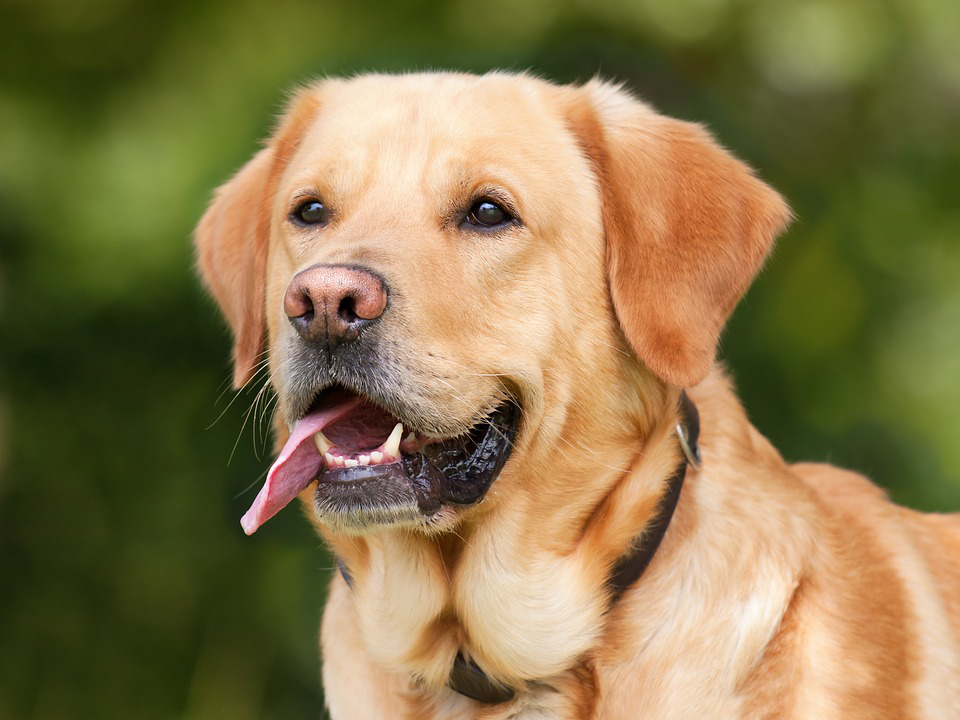

In [24]:
#show image
from IPython.display import display # to display images
from PIL import Image
img1 = Image.open('/content/drive/My Drive/Deep_Learning/CNN/DogCatDataset/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg')
display(img1)